## KoELECTRA Model

|  |  | layers | Embedding Size | Hidden Size | # heads |
| :---: | :---: | :---: | :--: | :--: | :--: |
| KoELECTRA-Base | Discriminator | 12 | 768 | 768 | 12 |
| | Generator | 12 | 768 | 256 | 4 |
| KoELECTRA-Small | Discriminator | 12 | 128 | 256 | 4 |
| | Generator | 12 | 128 | 256 | 4 |

- Tokenizer: Wordpiece tokenizer (Sentencepiece ([link](https://velog.io/@gibonki77/SentencePiece)), Mecab X)
    - Wordpiece tokenizer is a type of variation from BPE, which combines the tokens by corpus likelihood, and not frequency.
    - Developed by `Rust` language.
- Vocab Size: v1, v2 - 32,200 / v3 - 35,000
- Data
    - v1, v2: 14G corpus (2.6B Tokens) - news, wiki, namuwiki
    - v3: add 20G `모두의 말뭉치` (articles, conversation, messenger, web)

| Model | Batch Size | Training Steps | LR | Max Seq Len | Generator Size | Train Time
| :---: | :---: | :---: | :--: | :--: | :--: | :--: |
| Base v1, v2 | 256 | 700K | 2e-4 | 512 | 0.33 | 7d |
| Base v3 | 256 | 1.5M | 2e-4 | 512 | 0.33 | 14d |
| Small v1, v2 | 512 | 300K | 5e-4 | 512 | 1.0 | 3d |
| Small v3 | 256 | 800K | 5e-4 | 512 | 1.0 | 7d |

In [1]:
from transformers import ElectraModel, ElectraTokenizer

# ElectraModel
model = ElectraModel.from_pretrained("monologg/koelectra-base-v3-discriminator")
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [2]:
tokens = tokenizer.tokenize("[CLS] 한국어 ELECTRA를 공유합니다. [SEP]")
ids = tokenizer.convert_tokens_to_ids(tokens)
print("tokens: ", tokens)
print("ids: ", ids)

tokens:  ['[CLS]', '한국어', 'EL', '##EC', '##TRA', '##를', '공유', '##합니다', '.', '[SEP]']
ids:  [2, 11229, 29173, 13352, 25541, 4110, 7824, 17788, 18, 3]


In [1]:
# KorQuAD data analysis

import json

# training data
with open("../data/KorQuAD_v1.0_train.json", "r") as f:
    train_data = json.load(f)["data"]

# validation data
with open("../data/KorQuAD_v1.0_dev.json") as f:
    valid_data = json.load(f)["data"]

In [2]:
print(
    f"""
N train_data: {len(train_data)}
Keys: {train_data[0].keys()}
Sample document title: {train_data[0]["title"]}
N Sample document paragraphs: {len(train_data[0]["paragraphs"])}
Sample document paragraph keys: {train_data[0]["paragraphs"][0].keys()}
Sample document paragraph qa: {train_data[0]["paragraphs"][0]["qas"][0]}
Sample document paragraph context: {train_data[0]["paragraphs"][0]["context"]}
"""
)


N train_data: 1420
Keys: dict_keys(['paragraphs', 'title'])
Sample document title: 파우스트_서곡
N Sample document paragraphs: 3
Sample document paragraph keys: dict_keys(['qas', 'context'])
Sample document paragraph qa: {'answers': [{'text': '교향곡', 'answer_start': 54}], 'id': '6566495-0-0', 'question': '바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?'}
Sample document paragraph context: 1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보

In [39]:
tokenizer.unk_token

'[UNK]'

--- Train data stats ---
N paragraphs: 1420 | N context: 2667172 | N qa pairs: 60407
N [UNK] tokens: 2655 | Percentage of [UNK] tokens:  0.10%
N tokens max: 5925 | N tokens min: 147 | N tokens median: 245.0


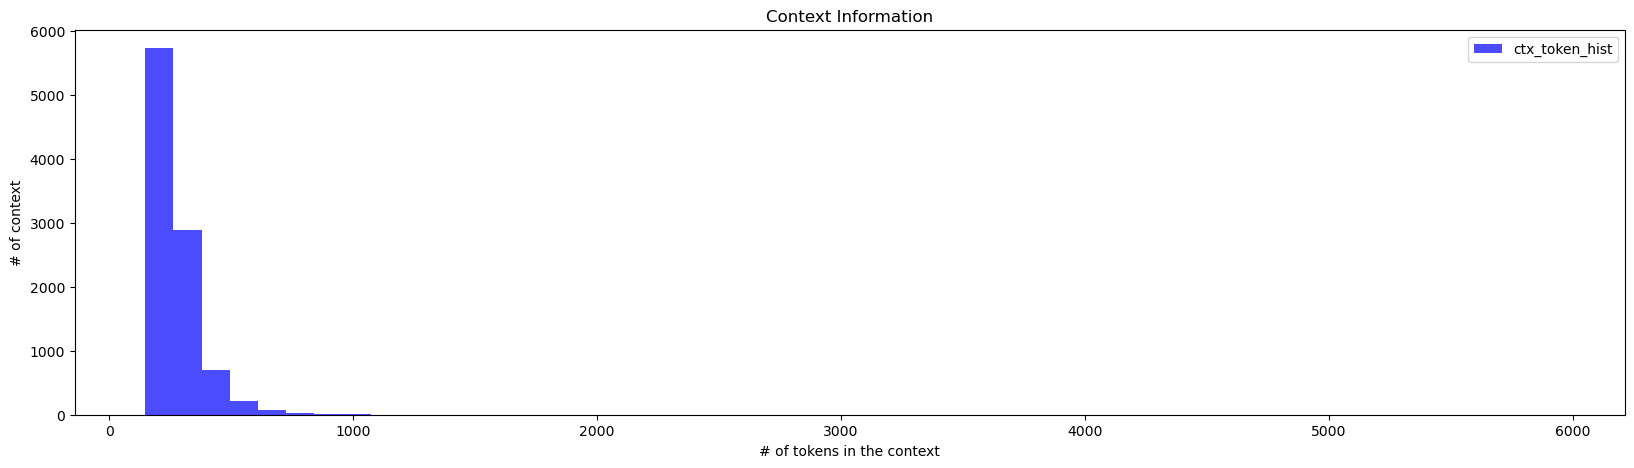

--- Validation data stats ---
N paragraphs: 140 | N context: 275408 | N qa pairs: 5774
N [UNK] tokens: 246 | Percentage of [UNK] tokens:  0.09%
N tokens max: 1450 | N tokens min: 166 | N tokens median: 244.5


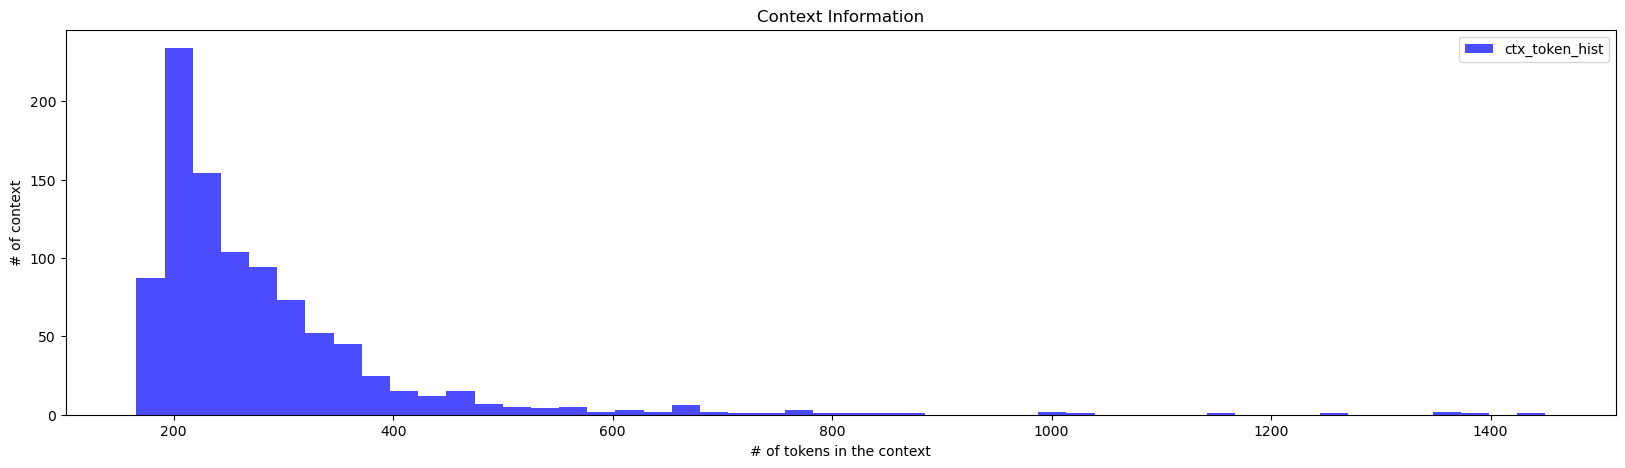

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from transformers.tokenization_utils import PreTrainedTokenizer


def cnt_korquad_data(data: List[dict], tokenizer: PreTrainedTokenizer):
    n_paragraphs, n_ctx, n_qas = 0, 0, 0
    n_unks = 0

    ctx_lens = []
    for datus in data:
        n_paragraphs += 1
        n_ctx += len(datus["paragraphs"])
        for ctx in datus["paragraphs"]:
            tokens = tokenizer.tokenize(ctx["context"])
            n_ctx += len(tokens)
            if tokenizer.unk_token in tokens:
                n_unks += len(
                    [token for token in tokens if token == tokenizer.unk_token]
                )
        ctx_lens.extend(
            [len(tokenizer.tokenize(ctx["context"])) for ctx in datus["paragraphs"]]
        )
        for paragraph in datus["paragraphs"]:
            n_qas += len(paragraph["qas"])
    print(f"N paragraphs: {n_paragraphs} | N context: {n_ctx} | N qa pairs: {n_qas}")

    # plot tokens length histogram
    print(
        f"N [UNK] tokens: {n_unks} | Percentage of [UNK] tokens: {100 * n_unks/sum(ctx_lens): .2f}%"
    )
    print(
        f"N tokens max: {max(ctx_lens)} | N tokens min: {min(ctx_lens)} | N tokens median: {np.median(ctx_lens)}"
    )
    plt.figure(figsize=(20, 5))
    plt.hist(
        x=ctx_lens,
        bins=50,
        density=False,
        color="blue",
        alpha=0.7,
        label="ctx_token_hist",
    )
    plt.xlabel("# of tokens in the context")
    plt.ylabel("# of context")
    plt.title("Context Information")
    plt.legend()
    plt.show()


print("--- Train data stats ---")
cnt_korquad_data(train_data, tokenizer)

print("--- Validation data stats ---")
cnt_korquad_data(valid_data, tokenizer)